# The Battle of Neighborhoods: Just Eat Belfast Bikes scheme

by Luca Mancino

Belfast is the capital and largest city of Northern Ireland (UK). The geographical coordinates of the city are (+54.5973,+5.9301). The city offers the Just Eat Belfast Bikes scheme providing a low cost, convenient and sustainable way to travel about the city. More specifically, there are 47 docking stations: in this project, we explore the rentals and returns statistics for six docking stations (Belfast City Hall, Waterfront, Queen's University Belfast/Botanic Gardens, St. Malachy's Church, Writer's Square, Odyssey) from 2015 to 2017. The purpose is to understand how the different docking stations are used and if some of the docking stations are not offering a high amount of rentals. 

We make use of different .csv files (Belfast City Council Open Data) to obtain:  
- the monthly number of rentals and returns from 2015 to 2017, # BelfastBikesRH_APR15JUL17.csv;
- the coordinates of each docking station # bikestations_belfast.csv;
- the coordinates of the parks (which can stimulate bike activities) # parksdata_belfast.csv.

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # Pandas Library
import numpy as np # Numpy Library
import matplotlib as mpl # Matplotlib Library
import folium # Folium Library
import geopandas as gpd # GeoPandas Library

import matplotlib.pyplot as plt

In [3]:
# read_csv procedures
df_parks=pd.read_csv('parksdata_belfast.csv') # dataset containing the Parks coordinates (Belfast)
df_bikestations=pd.read_csv('bikestations_belfast.csv') # dataset containing the bike station coordinates (Belfast)

In [4]:
# In what follows, we reindex the 'Latitude' and 'Longitude' coordinates accordingly
column_names_parks = ['NAME','ADDRESS','POSTCODE','LATITUDE','LONGITUDE']
df_parks = df_parks.reindex(columns=column_names_parks)

In [5]:
df_bikestations.columns=['STATION NUMBER','LOCATION','BNG_X','BNG_Y','LATITUDE','LONGITUDE','IG_EASTING','IG_NORTHING']

In [6]:
df_parks_coord=df_parks.iloc[0:,3:5] # Pandas sub-dataset of Belfast parks coordinates
df_bikestations_coord=df_bikestations.iloc[0:,4:6] # Pandas sub-dataset of Belfast bikestations coordinates

In [7]:
df_bikes_rentals=pd.read_csv('BelfastBikesRH_APR15JUL17.csv')

In [8]:
# Belfast City Hall 'rental station'
df_bikes_rentals_cityhall=df_bikes_rentals[df_bikes_rentals['Place name'].str.contains('Hall')] # City Hall
# Select the sub-dataset
df_cityhall_2015=df_bikes_rentals_cityhall[df_bikes_rentals_cityhall['Year']==2015] # 2015
df_cityhall_2016=df_bikes_rentals_cityhall[df_bikes_rentals_cityhall['Year']==2016] # 2016
df_cityhall_2017=df_bikes_rentals_cityhall[df_bikes_rentals_cityhall['Year']==2017] # 2017

# Belfast Waterfront 'rental station'
df_bikes_rentals_waterfront=df_bikes_rentals[df_bikes_rentals['Place name'].str.contains('Waterfront')] # Waterfront
# Select the sub-dataset
df_waterfront_2015=df_bikes_rentals_waterfront[df_bikes_rentals_waterfront['Year']==2015] # 2015
df_waterfront_2016=df_bikes_rentals_waterfront[df_bikes_rentals_waterfront['Year']==2016] # 2016
df_waterfront_2017=df_bikes_rentals_waterfront[df_bikes_rentals_waterfront['Year']==2017] # 2017

# Belfast Queen's/Botanic 'rental station'
df_bikes_rentals_QUB=df_bikes_rentals[df_bikes_rentals['Place name'].str.contains('Botanic Gardens')] # QUB/Botanic Gardens
# Select the sub-dataset
df_QUB_2015=df_bikes_rentals_QUB[df_bikes_rentals_QUB['Year']==2015] # 2015
df_QUB_2016=df_bikes_rentals_QUB[df_bikes_rentals_QUB['Year']==2016] # 2016
df_QUB_2017=df_bikes_rentals_QUB[df_bikes_rentals_QUB['Year']==2017] # 2017

# Belfast Malachy's Church 'rental station'
df_bikes_rentals_Malachy=df_bikes_rentals[df_bikes_rentals['Place name'].str.contains('Alfred Street')] # Alfred Street/St. Malachy's Church
# Select the sub-dataset
df_Malachy_2015=df_bikes_rentals_Malachy[df_bikes_rentals_Malachy['Year']==2015] # 2015
df_Malachy_2016=df_bikes_rentals_Malachy[df_bikes_rentals_Malachy['Year']==2016] # 2016
df_Malachy_2017=df_bikes_rentals_Malachy[df_bikes_rentals_Malachy['Year']==2017] # 2017

# Belfast Writer's Square 'rental station'
df_bikes_rentals_Writer=df_bikes_rentals[df_bikes_rentals['Place name'].str.contains('Writer')] # Writer's Square/St Anne's Cathedral
# Select the sub-dataset
df_Writer_2015=df_bikes_rentals_Writer[df_bikes_rentals_Writer['Year']==2015] # 2015
df_Writer_2016=df_bikes_rentals_Writer[df_bikes_rentals_Writer['Year']==2016] # 2016
df_Writer_2017=df_bikes_rentals_Writer[df_bikes_rentals_Writer['Year']==2017] # 2017

# Belfast Odyssey 'rental station'
df_bikes_rentals_Odyssey=df_bikes_rentals[df_bikes_rentals['Place name'].str.contains('Odyssey')] # Odyssey/Sydenham Road
# Select the sub-dataset
df_Odyssey_2015=df_bikes_rentals_Odyssey[df_bikes_rentals_Odyssey['Year']==2015] # 2015
df_Odyssey_2016=df_bikes_rentals_Odyssey[df_bikes_rentals_Odyssey['Year']==2016] # 2016
df_Odyssey_2017=df_bikes_rentals_Odyssey[df_bikes_rentals_Odyssey['Year']==2017] # 2017

In [9]:
belfast_loc=[+54.59,-5.92];
belfast_map=folium.Map(
    location=belfast_loc,
    tiles='Stamen Terrain',
    zoom_start=12.5
)

### Rentals and Returns mean dispersions vs Year

##### The .mean() method is used to obtain an estimation of the monthly rental and return averages

#### Belfast City Hall

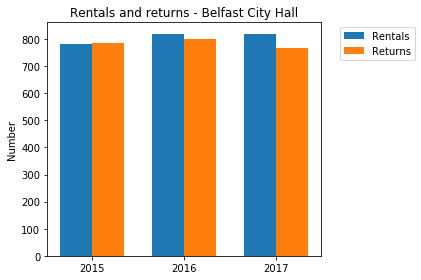

In [10]:
# Mean of Rentals - Belfast City Hall
cityhall_2015_mean_rentals=df_cityhall_2015['Rentals'].mean()
cityhall_2016_mean_rentals=df_cityhall_2016['Rentals'].mean()
cityhall_2017_mean_rentals=df_cityhall_2017['Rentals'].mean()
# Mean of Returns - Belfast City Hall
cityhall_2015_mean_returns=df_cityhall_2015['Returns'].mean()
cityhall_2016_mean_returns=df_cityhall_2016['Returns'].mean()
cityhall_2017_mean_returns=df_cityhall_2017['Returns'].mean()
# Plots of Mean rentals and returns
labels = ['2015', '2016', '2017']
rentals_means = [cityhall_2015_mean_rentals, cityhall_2016_mean_rentals, cityhall_2017_mean_rentals]
returns_means = [cityhall_2015_mean_returns, cityhall_2016_mean_returns, cityhall_2017_mean_returns]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rentals_means, width, label='Rentals')
rects2 = ax.bar(x + width/2, returns_means, width, label='Returns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Rentals and returns - Belfast City Hall')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()

plt.show()

**OBSERVATIONS**: The 'Belfast City Hall' docking station statistics is more or less constant between 2015 and 2017. In particular:

- The average of monthly rentals between 2015 and 2017 is 807
- The average of monthly returns between 2015 and 2017 is 785

#### Waterfront

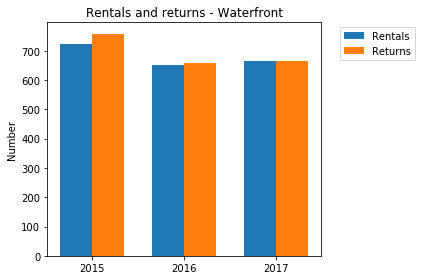

In [11]:
# Mean of Rentals - Waterfront
waterfront_2015_mean_rentals=df_waterfront_2015['Rentals'].mean()
waterfront_2016_mean_rentals=df_waterfront_2016['Rentals'].mean()
waterfront_2017_mean_rentals=df_waterfront_2017['Rentals'].mean()
# Mean of Returns - Waterfront
waterfront_2015_mean_returns=df_waterfront_2015['Returns'].mean()
waterfront_2016_mean_returns=df_waterfront_2016['Returns'].mean()
waterfront_2017_mean_returns=df_waterfront_2017['Returns'].mean()
# Plots of Mean rentals and returns
labels = ['2015', '2016', '2017']
rentals_means = [waterfront_2015_mean_rentals, waterfront_2016_mean_rentals, waterfront_2017_mean_rentals]
returns_means = [waterfront_2015_mean_returns, waterfront_2016_mean_returns, waterfront_2017_mean_returns]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rentals_means, width, label='Rentals')
rects2 = ax.bar(x + width/2, returns_means, width, label='Returns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Rentals and returns - Waterfront')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()

plt.show()

**OBSERVATIONS**: The 'Waterfront' docking station in 2016 and 2017 has been used less than in 2015.

#### Queen's University Belfast/Botanic Gardens

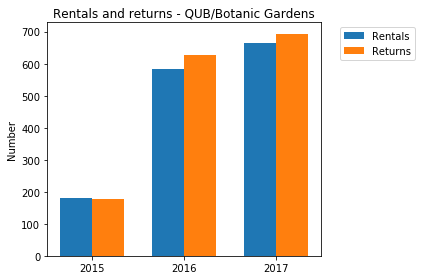

In [12]:
# Mean of Rentals - QUB
QUB_2015_mean_rentals=df_QUB_2015['Rentals'].mean()
QUB_2016_mean_rentals=df_QUB_2016['Rentals'].mean()
QUB_2017_mean_rentals=df_QUB_2017['Rentals'].mean()
# Mean of Returns - Waterfront
QUB_2015_mean_returns=df_QUB_2015['Returns'].mean()
QUB_2016_mean_returns=df_QUB_2016['Returns'].mean()
QUB_2017_mean_returns=df_QUB_2017['Returns'].mean()
# Plots of Mean rentals and returns
labels = ['2015', '2016', '2017']
rentals_means = [QUB_2015_mean_rentals, QUB_2016_mean_rentals, QUB_2017_mean_rentals]
returns_means = [QUB_2015_mean_returns, QUB_2016_mean_returns, QUB_2017_mean_returns]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rentals_means, width, label='Rentals')
rects2 = ax.bar(x + width/2, returns_means, width, label='Returns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Rentals and returns - QUB/Botanic Gardens')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()

plt.show()

**OBSERVATIONS**: The 'Queen's University/Botanic Gardens' docking station in 2016 and 2017 has been used more than in 2015. In detail, the rentals/returns in 2017 are more than those recorded in 2016. The interesting point is that the rentals/returns in 2015 were approximately 200 because the docking station was installed in the 27th of November 2015 (accordingly to http://www.belfastcity.gov.uk/News/News-57475.aspx)

#### Malachy's Church/Alfred Street

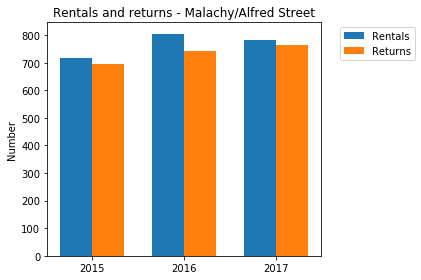

In [13]:
# Mean of Rentals - 
Malachy_2015_mean_rentals=df_Malachy_2015['Rentals'].mean()
Malachy_2016_mean_rentals=df_Malachy_2016['Rentals'].mean()
Malachy_2017_mean_rentals=df_Malachy_2017['Rentals'].mean()
# Mean of Returns - Waterfront
Malachy_2015_mean_returns=df_Malachy_2015['Returns'].mean()
Malachy_2016_mean_returns=df_Malachy_2016['Returns'].mean()
Malachy_2017_mean_returns=df_Malachy_2017['Returns'].mean()
# Plots of Mean rentals and returns
labels = ['2015', '2016', '2017']
rentals_means = [Malachy_2015_mean_rentals, Malachy_2016_mean_rentals, Malachy_2017_mean_rentals]
returns_means = [Malachy_2015_mean_returns, Malachy_2016_mean_returns, Malachy_2017_mean_returns]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rentals_means, width, label='Rentals')
rects2 = ax.bar(x + width/2, returns_means, width, label='Returns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Rentals and returns - Malachy/Alfred Street')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()

plt.show()

**OBSERVATIONS**: The 'St. Malachy\'s Church/Alfred Street' docking station statistics is more or less constant between 2015 and 2017.

#### Writer's Square

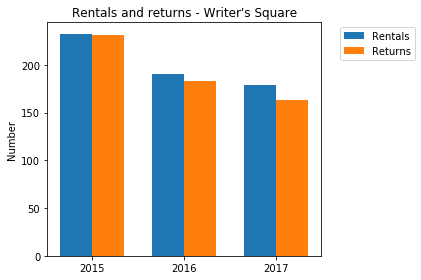

In [14]:
# Mean of Rentals - 
Writer_2015_mean_rentals=df_Writer_2015['Rentals'].mean()
Writer_2016_mean_rentals=df_Writer_2016['Rentals'].mean()
Writer_2017_mean_rentals=df_Writer_2017['Rentals'].mean()
# Mean of Returns - Waterfront
Writer_2015_mean_returns=df_Writer_2015['Returns'].mean()
Writer_2016_mean_returns=df_Writer_2016['Returns'].mean()
Writer_2017_mean_returns=df_Writer_2017['Returns'].mean()
# Plots of Mean rentals and returns
labels = ['2015', '2016', '2017']
rentals_means = [Writer_2015_mean_rentals, Writer_2016_mean_rentals, Writer_2017_mean_rentals]
returns_means = [Writer_2015_mean_returns, Writer_2016_mean_returns, Writer_2017_mean_returns]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rentals_means, width, label='Rentals')
rects2 = ax.bar(x + width/2, returns_means, width, label='Returns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Rentals and returns - Writer\'s Square')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()

plt.show()

**OBSERVATIONS**: The 'Writer's Square' docking station in 2016 and 2017 has been used less than in 2015. In detail, the rentals/returns in 2017 are slightly less than those recorded in 2016. 

#### Odyssey/Sydenham Road

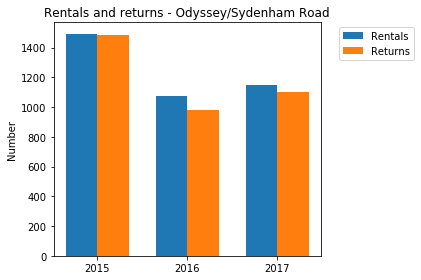

In [15]:
# Mean of Rentals - 
Odyssey_2015_mean_rentals=df_Odyssey_2015['Rentals'].mean()
Odyssey_2016_mean_rentals=df_Odyssey_2016['Rentals'].mean()
Odyssey_2017_mean_rentals=df_Odyssey_2017['Rentals'].mean()
# Mean of Returns - Waterfront
Odyssey_2015_mean_returns=df_Odyssey_2015['Returns'].mean()
Odyssey_2016_mean_returns=df_Odyssey_2016['Returns'].mean()
Odyssey_2017_mean_returns=df_Odyssey_2017['Returns'].mean()
# Plots of Mean rentals and returns
labels = ['2015', '2016', '2017']
rentals_means = [Odyssey_2015_mean_rentals, Odyssey_2016_mean_rentals, Odyssey_2017_mean_rentals]
returns_means = [Odyssey_2015_mean_returns, Odyssey_2016_mean_returns, Odyssey_2017_mean_returns]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rentals_means, width, label='Rentals')
rects2 = ax.bar(x + width/2, returns_means, width, label='Returns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Rentals and returns - Odyssey/Sydenham Road')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()

plt.show()

**OBSERVATIONS**: The 'Odyssey/Sydenham Road' docking station in 2016 and 2017 has been used less than in 2015. However, this docking station has the highest number of rentals/returns of the analysed sample. 

### Comparison of the analysed bike rental stations in 2015 

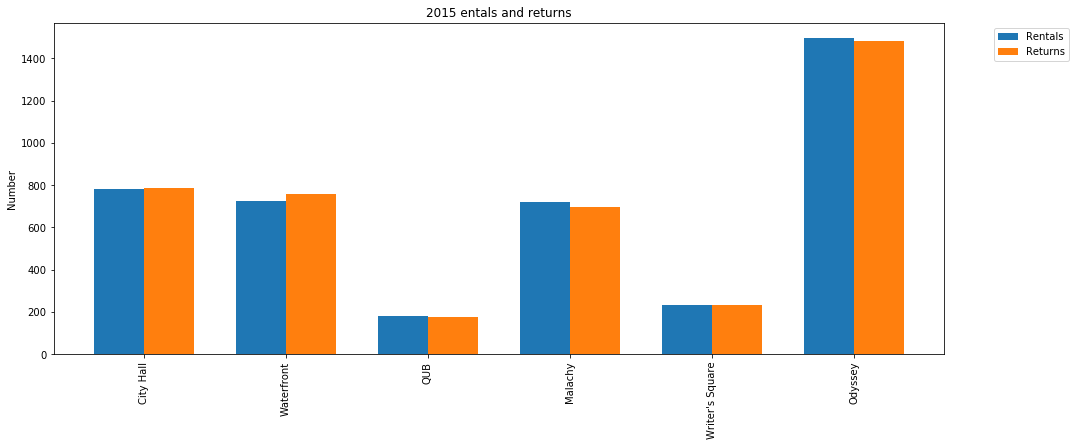

In [16]:
# Plots of Mean rentals and returns
labels = ['City Hall', 'Waterfront', 'QUB', 'Malachy', 'Writer\'s Square', 'Odyssey']
rentals_means = [cityhall_2015_mean_rentals, waterfront_2015_mean_rentals, QUB_2015_mean_rentals, Malachy_2015_mean_rentals, Writer_2015_mean_rentals, Odyssey_2015_mean_rentals]
returns_means = [cityhall_2015_mean_returns, waterfront_2015_mean_returns, QUB_2015_mean_returns, Malachy_2015_mean_returns, Writer_2015_mean_returns, Odyssey_2015_mean_returns]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rentals_means, width, label='Rentals')
rects2 = ax.bar(x + width/2, returns_means, width, label='Returns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('2015 entals and returns')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(rotation=90)
fig.tight_layout()

fig.set_size_inches(20,8)

plt.show()

### Comparison of the analysed bike rental stations in 2016

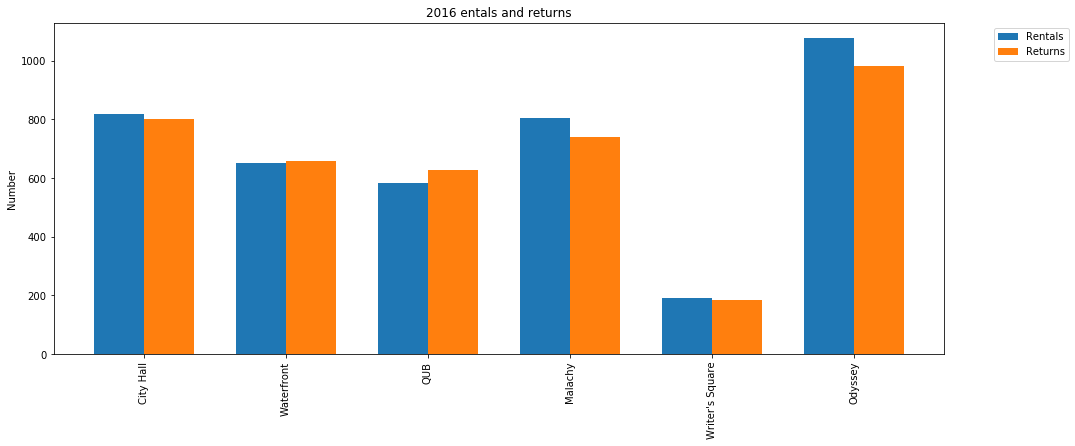

In [17]:
# Plots of Mean rentals and returns
labels = ['City Hall', 'Waterfront', 'QUB', 'Malachy', 'Writer\'s Square', 'Odyssey']
rentals_means = [cityhall_2016_mean_rentals, waterfront_2016_mean_rentals, QUB_2016_mean_rentals, Malachy_2016_mean_rentals, Writer_2016_mean_rentals, Odyssey_2016_mean_rentals]
returns_means = [cityhall_2016_mean_returns, waterfront_2016_mean_returns, QUB_2016_mean_returns, Malachy_2016_mean_returns, Writer_2016_mean_returns, Odyssey_2016_mean_returns]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rentals_means, width, label='Rentals')
rects2 = ax.bar(x + width/2, returns_means, width, label='Returns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('2016 entals and returns')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(rotation=90)
fig.tight_layout()

fig.set_size_inches(20,8)

plt.show()

### Comparison of the analysed bike rental stations in 2017

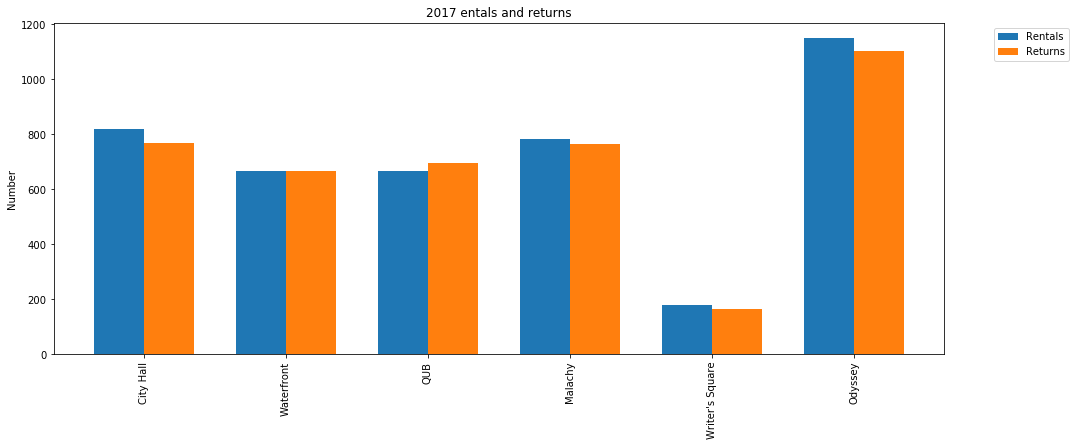

In [18]:
# Plots of Mean rentals and returns
labels = ['City Hall', 'Waterfront', 'QUB', 'Malachy', 'Writer\'s Square', 'Odyssey']
rentals_means = [cityhall_2017_mean_rentals, waterfront_2017_mean_rentals, QUB_2017_mean_rentals, Malachy_2017_mean_rentals, Writer_2017_mean_rentals, Odyssey_2017_mean_rentals]
returns_means = [cityhall_2017_mean_returns, waterfront_2017_mean_returns, QUB_2017_mean_returns, Malachy_2017_mean_returns, Writer_2017_mean_returns, Odyssey_2017_mean_returns]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rentals_means, width, label='Rentals')
rects2 = ax.bar(x + width/2, returns_means, width, label='Returns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('2017 entals and returns')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(rotation=90)
fig.tight_layout()

fig.set_size_inches(20,8)

plt.show()

## Coordinates of the bike rental stations

In [19]:
# In list_loc, 'Cathedral Gardens' stands for 'Writer's Square' (we are using two different datasets)
list_loc=['Hall','Waterfront','Botanic Gardens','Malachy','Cathedral Gardens','Odyssey']
list_lat=[];
list_lon=[];
for jj in range(0,len(list_loc)):
    index_loc=df_bikestations[df_bikestations['LOCATION'].str.contains(list_loc[jj])].index[0]
    index_lat=df_bikestations[df_bikestations['LOCATION'].str.contains(list_loc[jj])]['LATITUDE'][index_loc]
    list_lat.append(index_lat)
    index_lon=df_bikestations[df_bikestations['LOCATION'].str.contains(list_loc[jj])]['LONGITUDE'][index_loc]
    list_lon.append(index_lon)

## Bikestations and Parks Markers on the Belfast map (2017)

In [20]:
num_parks=df_parks.shape[0] # The number of bikestations in the dataset is 44. This is used as parameter for the 'For' loop

In [21]:
color_list=['red','red','red','red','purple','orange'];

In [30]:
for jj in range(0,len(list_loc)):
    folium.Circle(
    radius=35,
    location=[list_lat[jj], list_lon[jj]],
    color=color_list[jj],
    fill=True,
).add_to(belfast_map)
    
for jj in range(0,num_parks):
    folium.Circle(
    radius=35,
    location=[df_parks['LATITUDE'][jj], df_parks['LONGITUDE'][jj]],
    color='Green',
    fill=True,
).add_to(belfast_map)

In [31]:
belfast_map